<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analysis and Prediction of HDB Resale Flat Price

## Contents:
- [Data Modelling and Prediction](#Data-Modelling-and-Prediction)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Data Modelling and Prediction
The following codes are used for model building and prediction of HDB resale price. 

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Set the display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read in the cleaned dataset
df = pd.read_csv("../datasets/cleaned_train.csv")

In [4]:
# Summary statistics of numeric variables in our cleaned dataset.
df.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,postal_sector,dist_CBD
count,149742.000000,149742.000000,149742.000000,1.497420e+05,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.0,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.00000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000
mean,92855.241362,97.222615,1992.315576,4.486662e+05,2016.466763,6.586923,8.263173,7.226523,9.299822,8.263173,1046.504227,433.489815,28.684424,15.108012,1990.788677,1.0,0.191890,0.000100,0.000280,0.000755,124.599411,0.13964,1.766358,39.293558,49.921846,26.296637,5.975999,0.024115,0.431235,0.063990,0.626090,0.059603,0.000341,553581.399100,1.366179,103.839328,664.426314,0.489883,1.796223,5.197186,1167.571392,0.490397,1.409912,3.802580,48.704432,58.310133,764.154674,0.545071,0.261309,1.365614,103.839342,115.201164,1.366187,103.839308,394.967802,55.301031,0.113235,1.366217,103.839046,507.652819,210.125095,0.031902,1.365940,103.839274,55.252407,12377.719617
std,53639.094344,24.441882,12.042246,1.432380e+05,2.742201,3.339657,5.482516,5.489519,5.481949,5.482516,263.092422,104.177214,12.042246,6.195127,12.103972,0.0,0.393788,0.010008,0.016745,0.027460,58.317803,5.96565,11.688068,68.868183,45.240904,33.491971,19.183276,1.138859,5.212640,2.034205,11.226896,0.669194,0.024377,187513.206992,0.042871,0.072514,368.678327,0.729694,1.421096,3.470181,1071.120967,0.767238,1.711613,4.009482,19.152557,55.515556,429.109023,0.497966,0.439350,0.042577,0.072591,55.568108,0.042886,0.072527,234.207186,17.879847,0.316881,0.042692,0.072642,308.813798,20.005456,0.175739,0.042622,0.072640,18.732979,4467.364952
min,1.000000,31.000000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,1.000000,3.000000,2.000000,333.684000,205.108901,3.000000,2.000000,1949.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50004.000000,1.270380,103.685228,34.265581,0.000000,0.000000,0.000000,1.873295,0.000000,0.000000,0.000000,0.000000,0.000000,21.971410,0.000000,0.000000,1.265982,103.697143,9.001285,1.270759,103.684206,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207,5.000000,587.180417
25%,46233.250000,75.000000,1984.000000,3.460000e+05,2014.000000,4.000000,5.000000,4.000000,6.000000,5.000000,807.300000,364.676062,20.000000,12.000000,1983.000000,1.0,0

In [5]:
# Check the null values and data type of the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149742 entries, 0 to 149741
Data columns (total 80 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149742 non-null  int64  
 1   tranc_yearmonth            149742 non-null  object 
 2   town                       149742 non-null  object 
 3   flat_type                  149742 non-null  object 
 4   block                      149742 non-null  object 
 5   street_name                149742 non-null  object 
 6   storey_range               149742 non-null  object 
 7   floor_area_sqm             149742 non-null  float64
 8   flat_model                 149742 non-null  object 
 9   lease_commence_date        149742 non-null  int64  
 10  resale_price               149742 non-null  float64
 11  tranc_year                 149742 non-null  int64  
 12  tranc_month                149742 non-null  int64  
 13  mid_storey                 14

We noted that postal_sector was read in as integer data type, we need to update data type to string in order to create dummy variables in subsequent modelling.

In [6]:
# Convert data type of postal_sector to string
df["postal_sector"] = df["postal_sector"].astype("str")
df["postal_sector"].dtypes

dtype('O')

## Data Modelling

In [7]:
# Show the count of each flat_model 
df.groupby("flat_model")["flat_model"].count().sort_values()

flat_model
2-room                        4
Premium Maisonette           15
Improved-Maisonette          19
Premium Apartment Loft       50
Multi Generation             56
Terrace                      95
Type S2                     127
Type S1                     242
Adjoined flat               260
Model A-Maisonette          262
DBSS                       1639
Model A2                   2064
Maisonette                 4362
Standard                   4860
Apartment                  6079
Simplified                 7238
Premium Apartment         14887
New Generation            23366
Improved                  38364
Model A                   45753
Name: flat_model, dtype: int64

From the EDA, we observed 2-room flat model which could likely be erroneous data, as there is no such flat model.
There are only 4 observations with flat_model = "2-room", hence we decided to drop the rows with flat_model = 2-room for modelling.

Source: 
[HDB Flat Types](https://www.teoalida.com/singapore/hdbflattypes/)
There are only 4 observations with flat_model = "2-room"

In [8]:
# Drop rows with flat_model = 2-room
df = df[df["flat_model"]!="2-room"]

In [9]:
# Assemble X and y variables
# Dummify the postal_sector and full_flat_type column to convert from categorical to numerical values
X = df[["tranc_year","floor_area_sqm","hdb_age","full_flat_type","mrt_nearest_distance","mall_nearest_distance","postal_sector","dist_CBD", "mid"]]
X = pd.get_dummies(data = X, columns =["postal_sector","full_flat_type"])

y = df['resale_price']

### Linear Regression (LR)

In [10]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start_LR = time.time()

# Instantiate and Fit Model
LR = LinearRegression()
LR.fit(X_train,y_train)

# Train Score (R-squared)
print(f"LR train performance:{LR.score(X_train,y_train)}")

# Test Score (R-squared)
print(f"LR test performance:{LR.score(X_test,y_test)}")

# Cross Val Score
LR_CV = cross_val_score(LR, X_train, y_train, cv=5).mean()
print(f"LR cross val train performance: {LR_CV}" )

# RMSE
predictions_LR = LR.predict(X_train)
LR_RMSE = metrics.mean_squared_error(y_train, predictions_LR, squared=False)
print(f"LR RMSE: {LR_RMSE}")

# Run time of the model (in seconds)
end_LR = time.time()
print(f"Total runtime: {end_LR - start_LR}")

LR train performance:0.8874063010688843
LR test performance:0.8854720151126729
LR cross val train performance: 0.8870932483892237
LR RMSE: 48132.41120433873
Total runtime: 11.327224016189575


### Linear Regression with Standard Scaling

In [11]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# We scale the features using StandardScaler
ss = StandardScaler()
# Compute the mean and std for X data to be used for scaling
ss.fit(X_train)
# Scale (Transform) X data based on its parameters  
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

# Instantiate and Fit Model
LR_scaled = LinearRegression()
LR_scaled.fit(X_scaled_train,y_train)

# Train Score (R-squared)
print(f"LR train performance:{LR_scaled.score(X_scaled_train,y_train)}")

# Test Score (R-squared)
print(f"LR test performance:{LR_scaled.score(X_scaled_test,y_test)}")

# Cross Val Score
LR_CV_scaled = cross_val_score(LR_scaled, X_scaled_train, y_train, cv=5).mean()
print(f"LR cross val train performance: {LR_CV_scaled}" )

# RMSE
predictions_LR_scaled = LR_scaled.predict(X_scaled_train)
LR_RMSE_scaled = metrics.mean_squared_error(y_train, predictions_LR_scaled, squared=False)
print(f"LR RMSE: {LR_RMSE_scaled}")

LR train performance:0.8873887705983139
LR test performance:0.8854433836535868
LR cross val train performance: -2.5874907050156996e+22
LR RMSE: 48136.15808797907


### Lasso Regression (LA)

In [12]:
start_LA = time.time()

# Instantiate and Fit Model
LA = Lasso(max_iter=10000)
LA.fit(X_train,y_train)
LA.predict(X_train)

# Train Score (R-squared)
print(f"LA train performance: {LA.score(X_train,y_train)}")

# Test Score (R-squared)
print(f"LA test performance: {LA.score(X_test,y_test)}")

# Cross Val Score
LA_CV = cross_val_score(LA, X_train, y_train, cv=5).mean()
print(f"LA cross val train performance: {LA_CV}" )

# RMSE
predictions_LA = LA.predict(X_train)
LA_RMSE = metrics.mean_squared_error(y_train, predictions_LR, squared=False)
print(f"LA RMSE : {LA_RMSE}")

# Run time of the model (in seconds)
end_LA = time.time()
print(f"Total runtime: {end_LA - start_LA}")

LA train performance: 0.8873973980802602
LA test performance: 0.8854602623396904
LA cross val train performance: 0.8870885893487264
LA RMSE : 48132.41120433873
Total runtime: 463.5418276786804


### Ridge Regression (RI)

In [13]:
start_RI = time.time()

# Instantiate and Fit Model
RI = Ridge()
RI.fit(X_train,y_train)
RI.predict(X_train)

# Train Score (R-squared)
print(f"RI train performance: {RI.score(X_train,y_train)}")

# Test Score (R-squared)
RI.score(X_test,y_test)
print(f"RI test performance: {RI.score(X_test,y_test)}")

# Cross Val Score
RI_CV = cross_val_score(RI, X_train, y_train, cv=5).mean()
print(f"RI cross val train performance: {RI_CV}" )

# RMSE
predictions_RI = RI.predict(X_train)
RI_RMSE = metrics.mean_squared_error(y_train, predictions_RI, squared=False)
print(f"RI RMSE: {RI_RMSE}")

# Run time of the model (in seconds)
end_RI = time.time()
print(f"Total runtime: {end_RI - start_RI}")

RI train performance: 0.8873960956702959
RI test performance: 0.8854743600266858
RI cross val train performance: 0.887085049385574
RI RMSE: 48134.59249563567
Total runtime: 3.0421860218048096


#### Summary of Performance metrics for each model: R-squared score, Cross-Validation score, RMSE and Total runtime

|Regression Model|Train<br>R-squared|Test<br>R-squared|Cross-Val|RMSE| Total Runtime (sec)|
|---|---|---|---|---|---|
|**Linear**|0.89|0.89|0.89|48,132|11
|**Lasso**|0.89|0.89|0.89|48,132|463
|**Ridge**|0.89|0.89|0.89|48,135|3

The R-squared score of train and test for all models are consistent, indicating no overfitting or underfitting. The cross-val score is consistent as well, indicating reliability of the model. Models are generalizable to new and unseen data.

Among the 3 models, Linear Regression Model  and Lasso Regression Model has the lowest RMSE. Between these two models, Linear Regression Model has a much faster runtime, as such we decided to deploy Linear Regression Model.

With Linear Regression Model, 89% of the variations in resale price can be explained by our selected features, with ±$48000 price difference.

### Generate coefficients for the trained Linear Regression Model

                                          Column_Name  Coefficient_Value
0                       full_flat_type_3 ROOM Terrace      310709.376305
1                                    postal_sector_50      310294.019072
2                       full_flat_type_4 ROOM Terrace      303942.077607
3                                    postal_sector_59      177744.832693
4                                    postal_sector_44      167216.260802
5                       full_flat_type_5 ROOM Type S2      138335.230590
6                          full_flat_type_5 ROOM DBSS      126328.833444
7                                    postal_sector_66      120699.926463
8        full_flat_type_5 ROOM Premium Apartment Loft      118694.063780
9           full_flat_type_5 ROOM Improved-Maisonette      115603.650044
10                                   postal_sector_26       98944.477627
11   full_flat_type_MULTI-GENERATION Multi Generation       94067.370823
12        full_flat_type_EXECUTIVE Premium Maisonet

<BarContainer object of 101 artists>

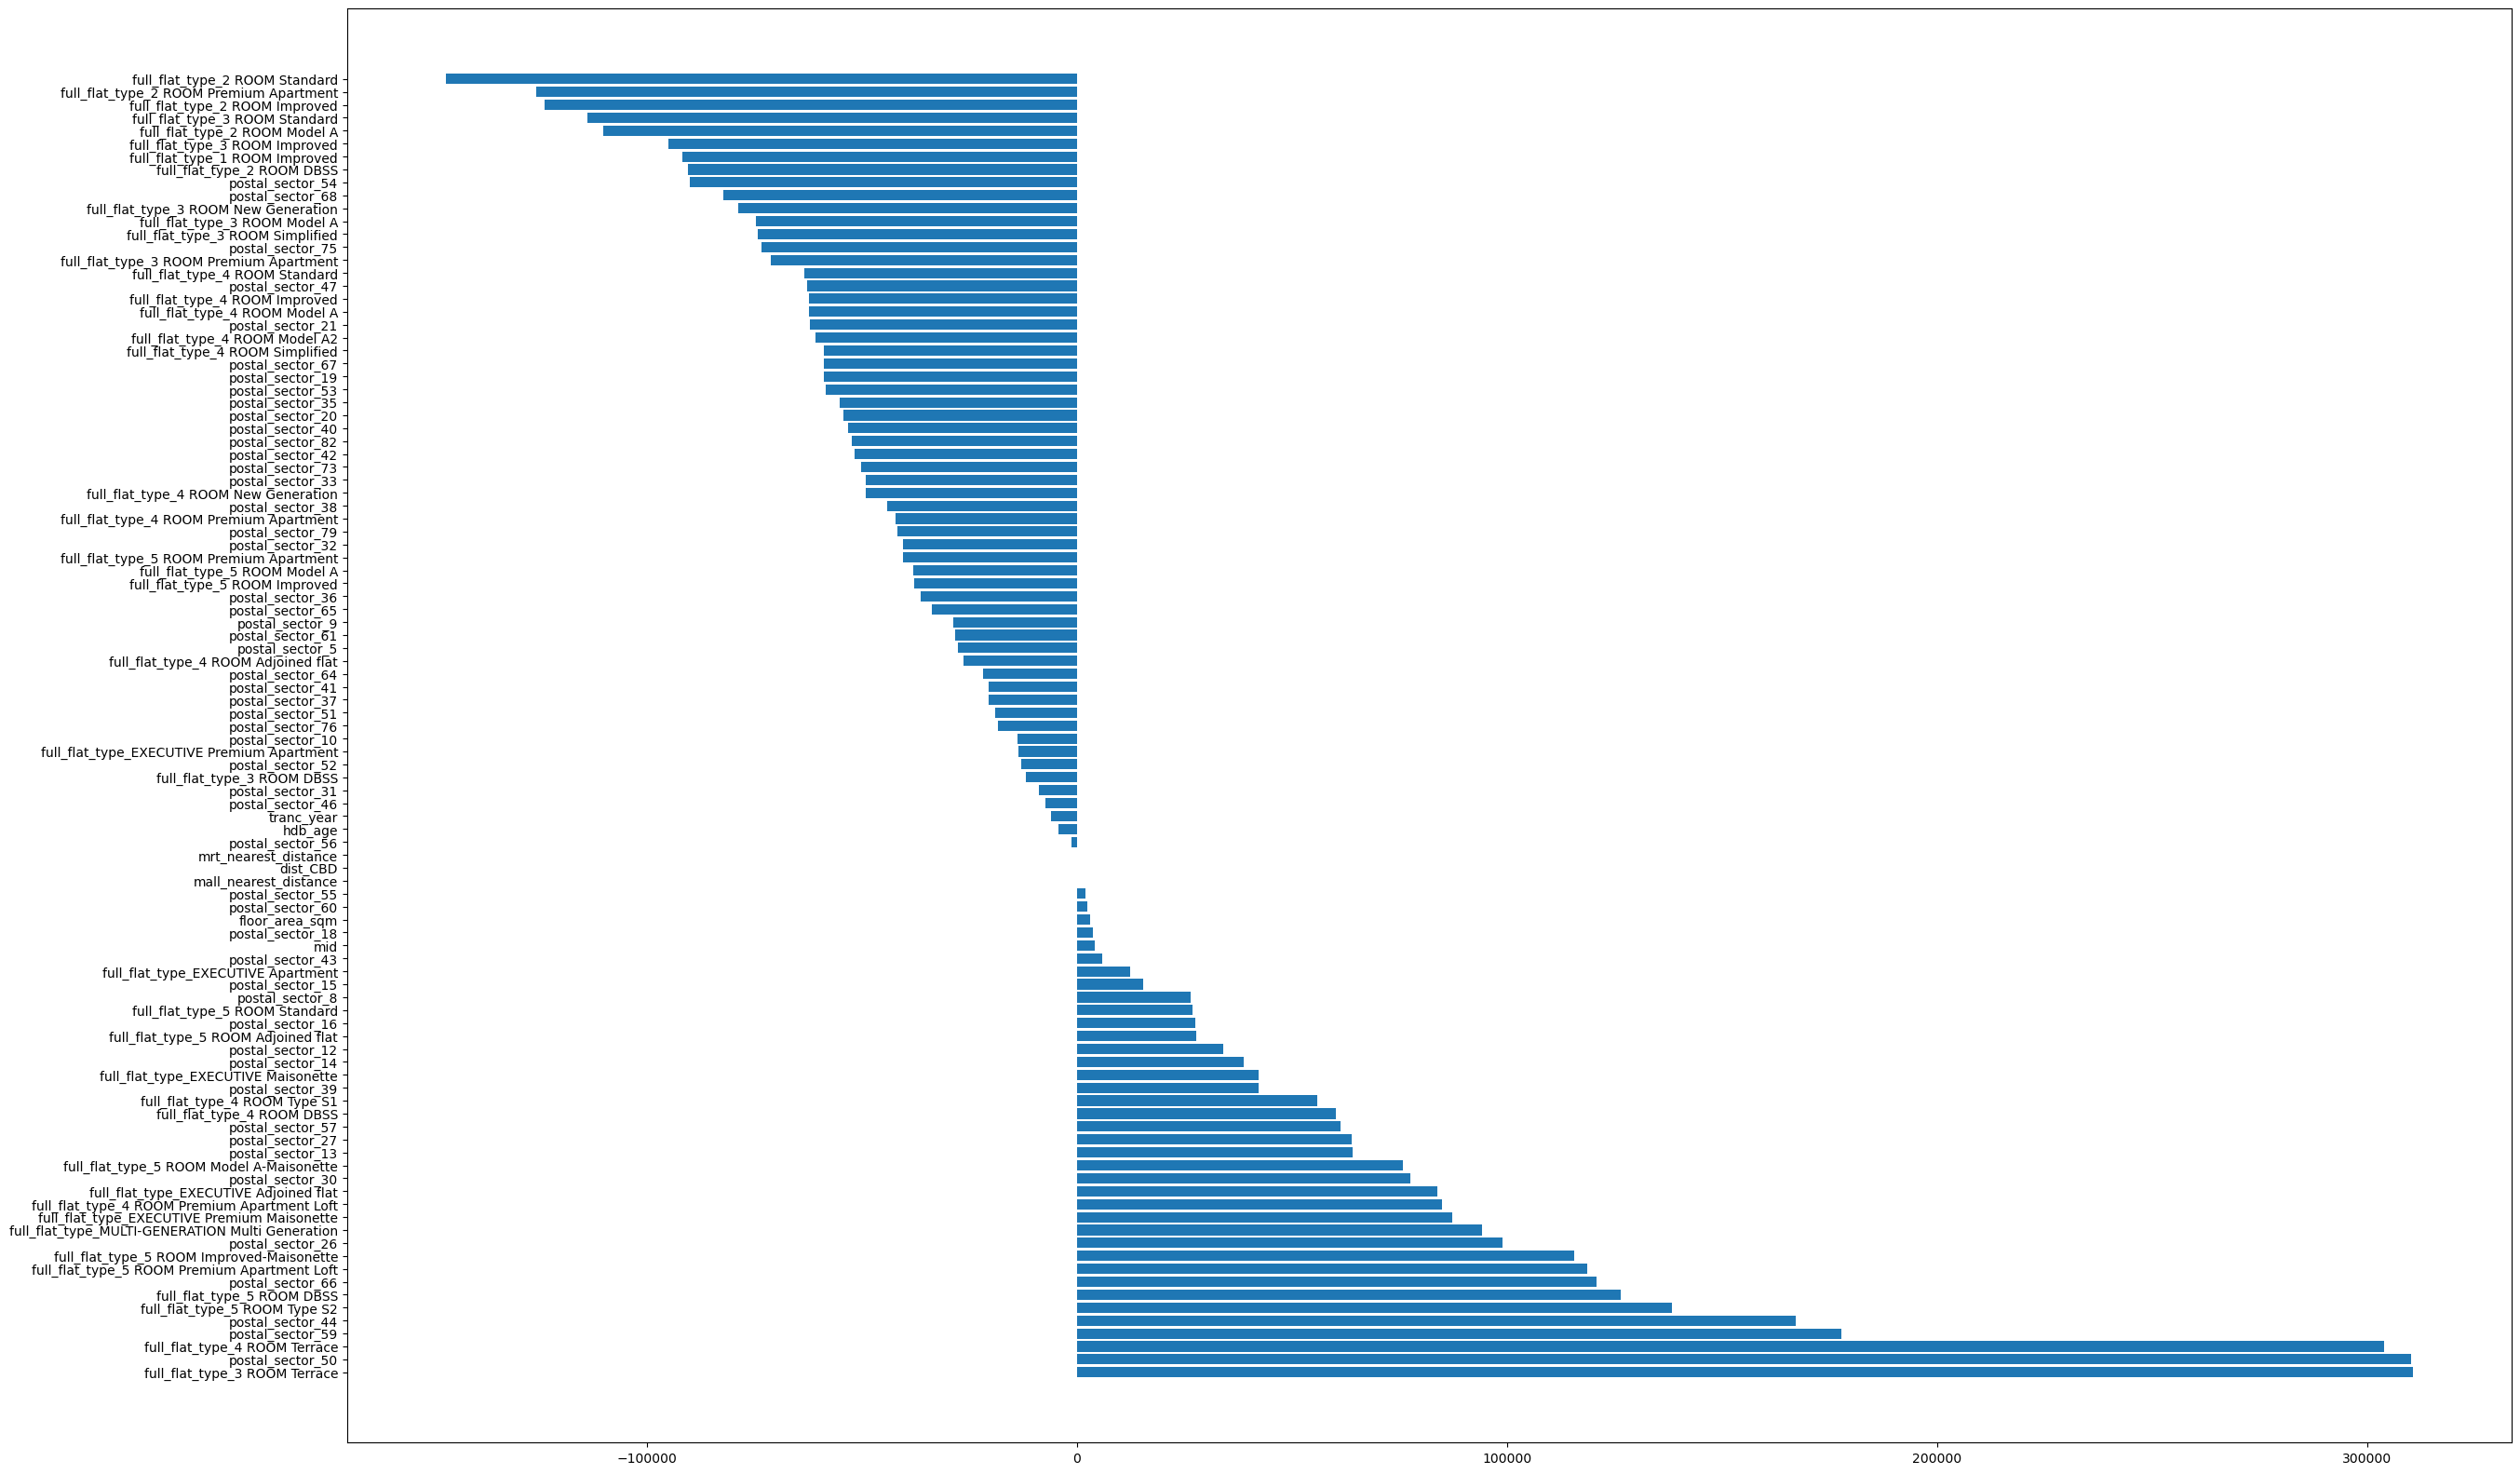

In [14]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df["Column_Name"] = X_train.columns

# Store coefficients of predictors
coefficient_df["Coefficient_Value"] = pd.Series(LR.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
coefficient_df = coefficient_df.sort_values(by='Coefficient_Value', ascending=False)
coefficient_df = coefficient_df.reset_index(drop=True)
print(coefficient_df)

# Plot the coefficent values
plt.rcParams["figure.figsize"] = (30,20)
plt.barh(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])
#plt.barh(coefficient_df["Coefficient_Value"], coefficient_df['Column_Name'])


In [15]:
# Sorting the coefficient by magnitude to identify the strongest feature

coefficient_df['abs'] = coefficient_df["Coefficient_Value"].abs()
coefficient_df = coefficient_df.sort_values(by='abs', ascending=False)
coefficient_df

,Column_Name,Coefficient_Value,abs
0,full_flat_type_3 ROOM Terrace,310709.376305,310709.376305
1,postal_sector_50,310294.019072,310294.019072
2,full_flat_type_4 ROOM Terrace,303942.077607,303942.077607
3,postal_sector_59,177744.832693,177744.832693
4,postal_sector_44,167216.260802,167216.260802
100,full_flat_type_2 ROOM Standard,-146893.052108,146893.052108
5,full_flat_type_5 ROOM Type S2,138335.230590,138335.230590
6,full_flat_type_5 ROOM DBSS,126328.833444,126328.833444
99,full_flat_type_2 ROOM Premium Apartment,-125817.668541,125817.668541
98,full_flat_type_2 ROOM Improved,-123775.073048,123775.073048


Based on the absolute magnitude of the coefficients, the stronger features in predicting the resale price would be flat attributes including flat model and type, as well as location based on postal sector. Features like amenities (mall_nearest_distance) and accessibility (mrt_nearest_distance) were not as strong in the price prediction.

## Conclusion and Recommendations

#### Conclusion
From 76 features, we selected 9 key features and built a user-friendly and accurate prediction calculator which can be used by potential homeowners to predict resale flat prices. With the understanding of how much their desired resale flat price will cost, they are better able to plan for their finances and ensure that they have sufficient CPF monies.
<br>[HDB RESALE PRICE CALCULATOR](https://dsi39-project2-colony.streamlit.app/)

#### Recommendations
1) Improve prediction score
 - Explore other factors (e.g. impact of cooling measures on resale price)
 - Explore other machine learning models

2) User Testing
- Test and improve app usability with focus groups

3) Public Launch
- Campaign launch to educate housing finance planning with calculation.

### Exporting Linear Regression Model for use in Streamlit App

In [16]:
import pickle
pickle.dump(LR, open("HDB_model_final.pkl", "wb"))